<a href="https://colab.research.google.com/github/siddhusalvi/Covid-Data-Visualization/blob/CasesDistribution/Covid_Data_Visualisation_using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

In [ ]:
!apt-get update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://archive.apache.org/dist/spark/spark-2.3.1/spark-2.3.1-bin-hadoop2.7.tgz
!tar xf spark-2.3.1-bin-hadoop2.7.tgz
!pip install -q findspark
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.3.1-bin-hadoop2.7"
import findspark
findspark.init()
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate() 
spark

Mounting Google Drive

In [ ]:
!pip install plotly==4.7.1
!wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca
!chmod +x /usr/local/bin/orca
!apt-get install xvfb libgtk2.0-0 libgconf-2-4
import plotly.graph_objects as go

In [ ]:
path = '/content/drive/My Drive/Siddhu/data/nation_data.csv'

In [ ]:
from pyspark.sql.types import ArrayType, StructField, StructType, StringType, IntegerType,DateType
from pyspark.sql.functions import col,when

In [ ]:
schema = StructType() \
      .add("Date",DateType(),True) \
      .add("DailyConfirmed",IntegerType(),True) \
      .add("TotalCases",IntegerType(),True) \
      .add("DailyRecovered",IntegerType(),True) \
      .add("TotalRecovered",IntegerType(),True) \
      .add("DailyDeceased",IntegerType(),True) \
      .add("TotalDeceased",IntegerType(),True) 
      

In [ ]:
nationDataDF = spark.read\
.format('csv')\
.schema(schema)\
.option("dateFormat", "dd/MM/YYYY")\
.option("header",True)\
.load(path)

In [ ]:
nationDataDF.count()

In [ ]:
nationDataDF.show(300)

In [ ]:
nationDataDF.printSchema

In [ ]:
import plotly.graph_objects as go

In [ ]:
date = nationDataDF.toPandas()['Date']
dailyConfirmed = nationDataDF.toPandas()['DailyConfirmed']
totalCases = nationDataDF.toPandas()['TotalCases']
dailyRecovered = nationDataDF.toPandas()['DailyRecovered']
totalRecovered = nationDataDF.toPandas()['TotalRecovered']
dailyDeceased = nationDataDF.toPandas()['DailyDeceased']
totalDeceased = nationDataDF.toPandas()['TotalDeceased']

# Cases Visualization



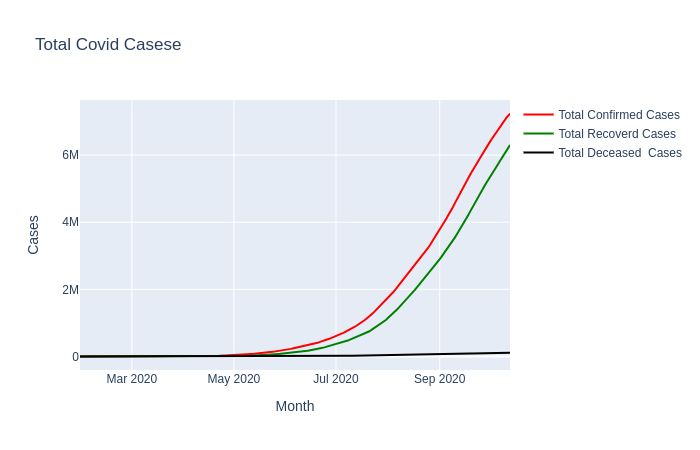

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=date, y=totalCases, name='Total Confirmed Cases',line=dict(color='red')))
fig.add_trace(go.Scatter(x=date, y=totalRecovered, name='Total Recoverd Cases',line=dict(color='green')))
fig.add_trace(go.Scatter(x=date, y=totalDeceased, name='Total Deceased  Cases',line=dict(color='black')))

fig.update_layout(title='Total Covid Casese',xaxis_title='Month', yaxis_title='Cases')

fig.show('png')

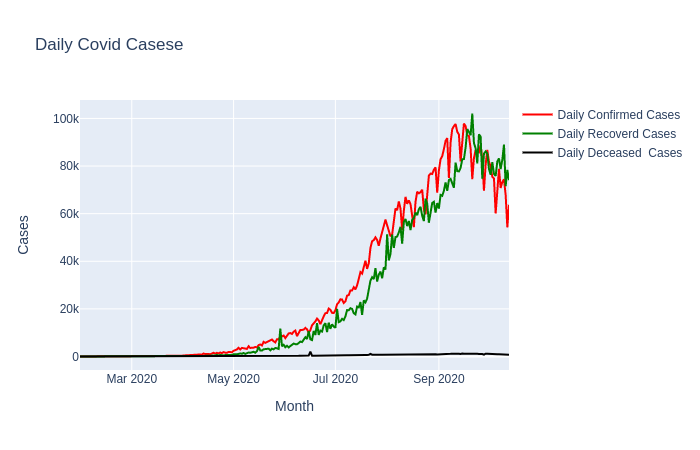

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=date, y=dailyConfirmed, name='Daily Confirmed Cases',line=dict(color='red')))
fig.add_trace(go.Scatter(x=date, y=dailyRecovered, name='Daily Recoverd Cases',line=dict(color='green')))
fig.add_trace(go.Scatter(x=date, y=dailyDeceased, name='Daily Deceased  Cases',line=dict(color='black')))

fig.update_layout(title='Daily Covid Casese',xaxis_title='Month', yaxis_title='Cases')

fig.show('png')